In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\dazvi\OneDrive\Desktop\Oasis intern\retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:
df.shape

(1000, 9)

In [8]:
df.size

9000

In [9]:
df.keys()

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [12]:
df.drop_duplicates(inplace=True)
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [14]:
df.size

9000

In [ ]:
#no duplicates are here

In [15]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [16]:
df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].mode()

,Age,Quantity,Price per Unit,Total Amount
0,43,4.0,50.0,50.0
1,64,NaN,NaN,NaN


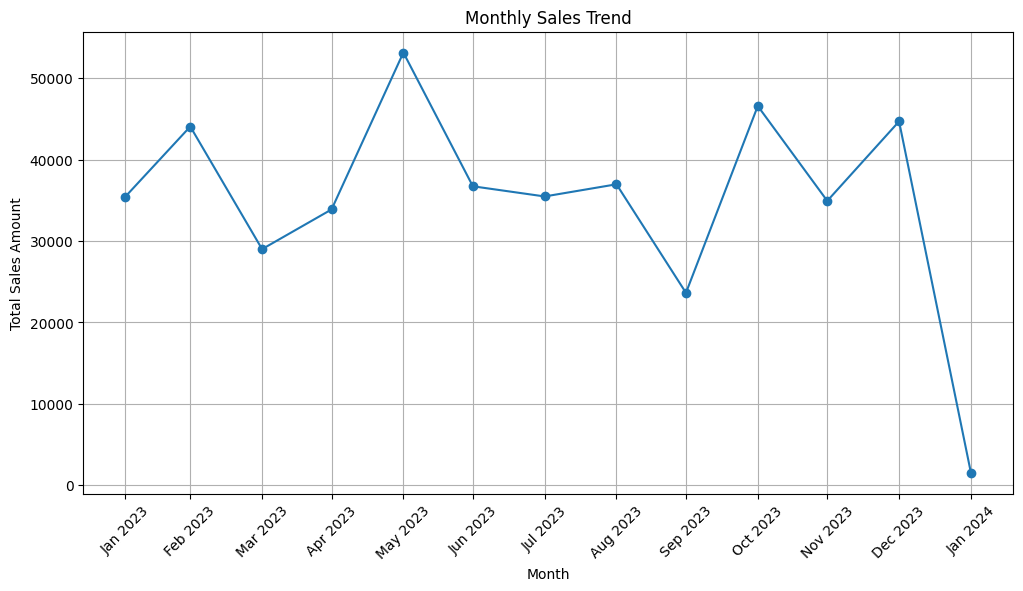

In [18]:
#time Series Analysis
df['Date']=pd.to_datetime(df['Date'])
monthly_sales = df.resample('M', on='Date')['Total Amount'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(ticks=monthly_sales.index, labels=[month.strftime('%b %Y') for month in monthly_sales.index], rotation=45)
plt.grid(True)
plt.show()

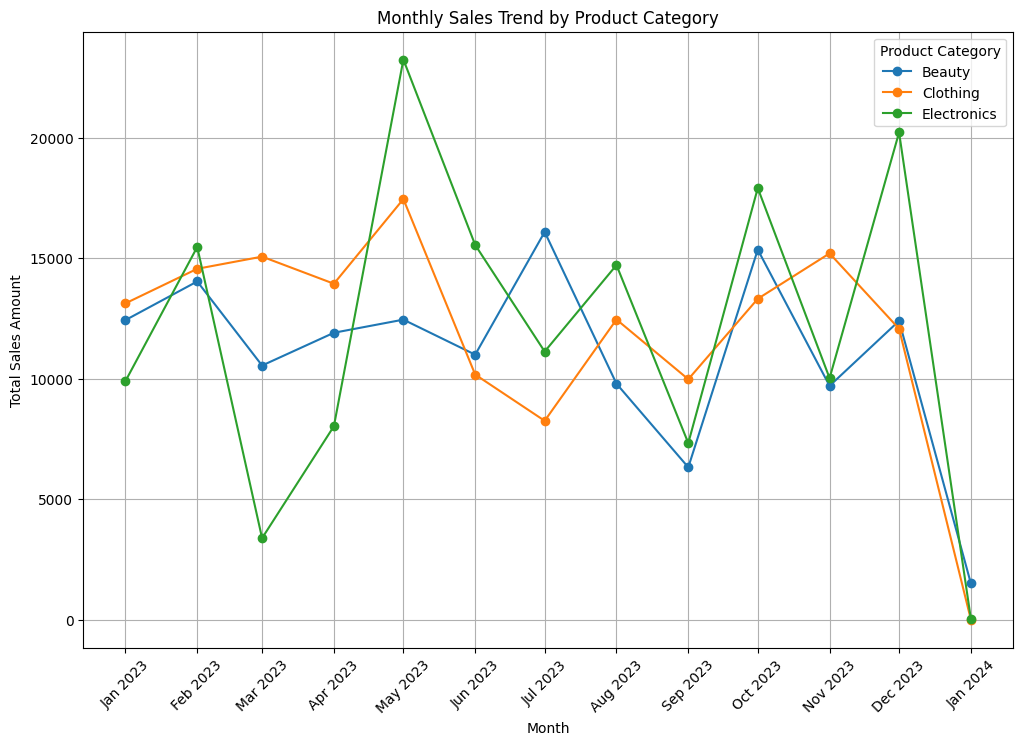

In [19]:
monthly_category_sales = df.groupby([df['Date'].dt.to_period('M'), 'Product Category'])['Total Amount'].sum().reset_index()

pivot_table = monthly_category_sales.pivot(index='Date', columns='Product Category', values='Total Amount').fillna(0)

plt.figure(figsize=(12, 8))
for category in pivot_table.columns:
    plt.plot(pivot_table.index.to_timestamp(), pivot_table[category], marker='o', label=category)  # Convert index to timestamp for better plotting

plt.title('Monthly Sales Trend by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.legend(title='Product Category')
plt.grid(True)
plt.xticks(ticks=pivot_table.index.to_timestamp(), labels=[date.strftime('%b %Y') for date in pivot_table.index.to_timestamp()], rotation=45)  # Convert index to timestamp and format the labels
plt.show()


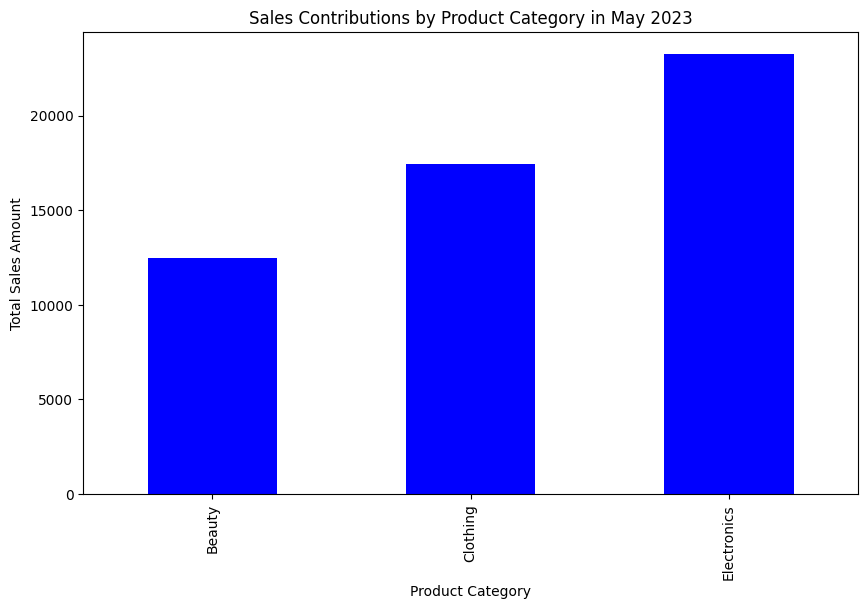

The total sales in the month of May is: 53150


In [20]:
start_date = '2023-05-01'
end_date = '2023-05-31'
data_may = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

category_sales_highest_month = data_may.groupby('Product Category')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
category_sales_highest_month.plot(kind='bar', color='blue')
plt.title('Sales Contributions by Product Category in May 2023')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.show()

total_sales_may = data_may['Total Amount'].sum()
print(f'The total sales in the month of May is: {total_sales_may}')

In [24]:
unique = df['Product Category'].unique()
for category in unique:
  print(category)

Beauty
Clothing
Electronics


Text(0.5, 1.0, 'Age distribution by product category')

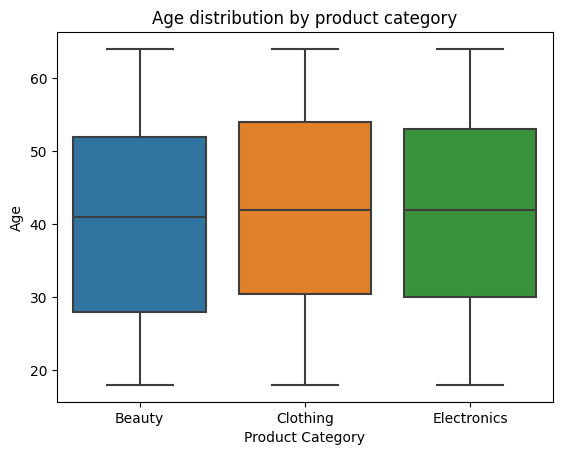

In [28]:
sns.boxplot(x=df['Product Category'],y=df['Age'],data=df).set_title('Age distribution by product category')

Text(0.5, 1.0, 'Age distribution by Gender')

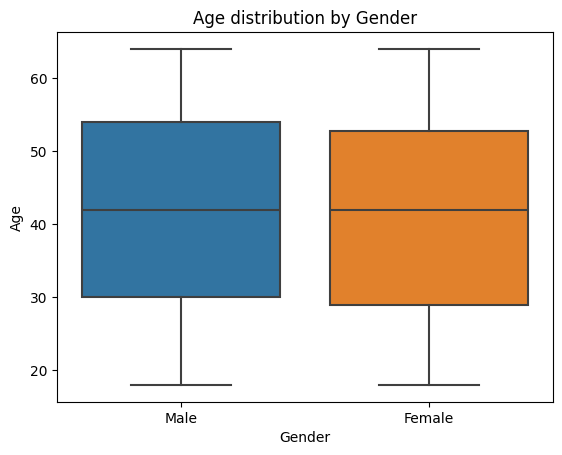

In [30]:
sns.boxplot(x=df['Gender'],y=df['Age'],data=df).set_title('Age distribution by Gender')

In [31]:
print("Number of records based on gender in percentage: ",df['Gender'].value_counts()/len(df['Gender']))

Number of records based on gender in percentage:  Gender
Female    0.51
Male      0.49
Name: count, dtype: float64


In [32]:
print(df['Total Amount'].max())
print(df['Total Amount'].min())

2000
25


array([<Axes: title={'center': 'Female'}>,
       <Axes: title={'center': 'Male'}>], dtype=object)

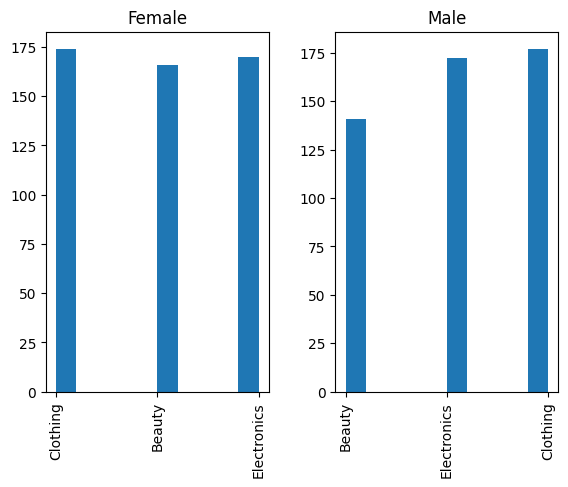

In [34]:
df.hist(column='Product Category',by='Gender')

<Axes: xlabel='Gender'>

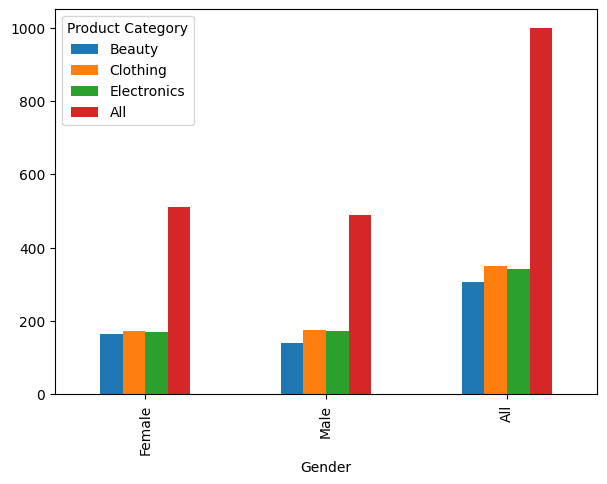

In [35]:
pd.crosstab(df['Gender'],df['Product Category'],margins=True).plot(kind='bar',figsize=(7,5))

In [36]:
product_category_distribution = df['Product Category'].value_counts()
print(product_category_distribution)


Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


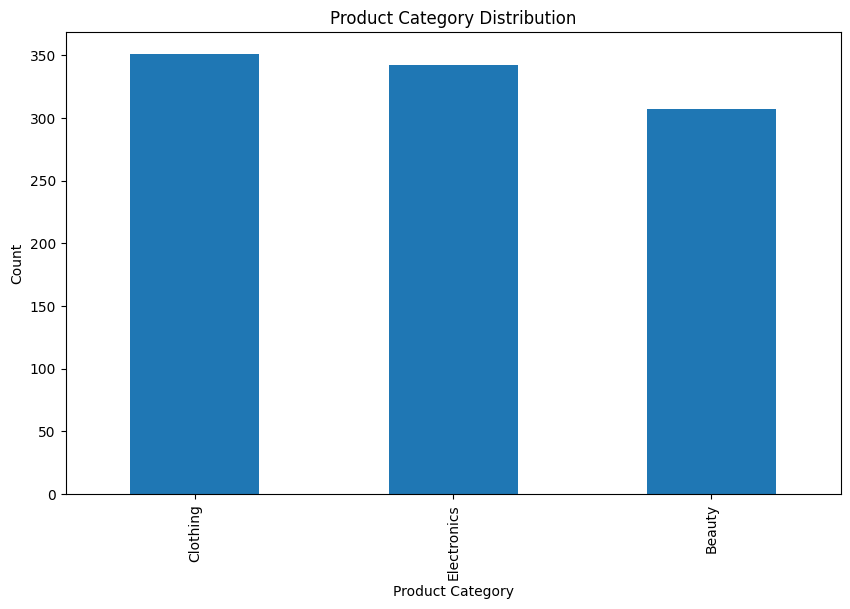

In [37]:
product_category_distribution.plot(kind='bar', figsize=(10, 6), title='Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

In [ ]:
'''Here we can see that clothing products are sold more in terms of transactions and beauty products are transacted less,
although there is no big difference between clothing and electronics both being transacted very high.'''

In [38]:
df['Month'] = df['Date'].dt.to_period('M')

pivot_table = df.pivot_table(
    index='Product Category',
    columns='Month',
    values='Total Amount',
    aggfunc='sum',
    fill_value=0
)
pivot_table

Month,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01
Product Category,,,,,,,,,,,,,
Beauty,12430,14035,10545,11905,12450,10995,16090,9790,6320,15355,9700,12400,1500
Clothing,13125,14560,15065,13940,17455,10170,8250,12455,9975,13315,15200,12070,0
Electronics,9895,15465,3380,8025,23245,15550,11125,14715,7325,17910,10020,20220,30


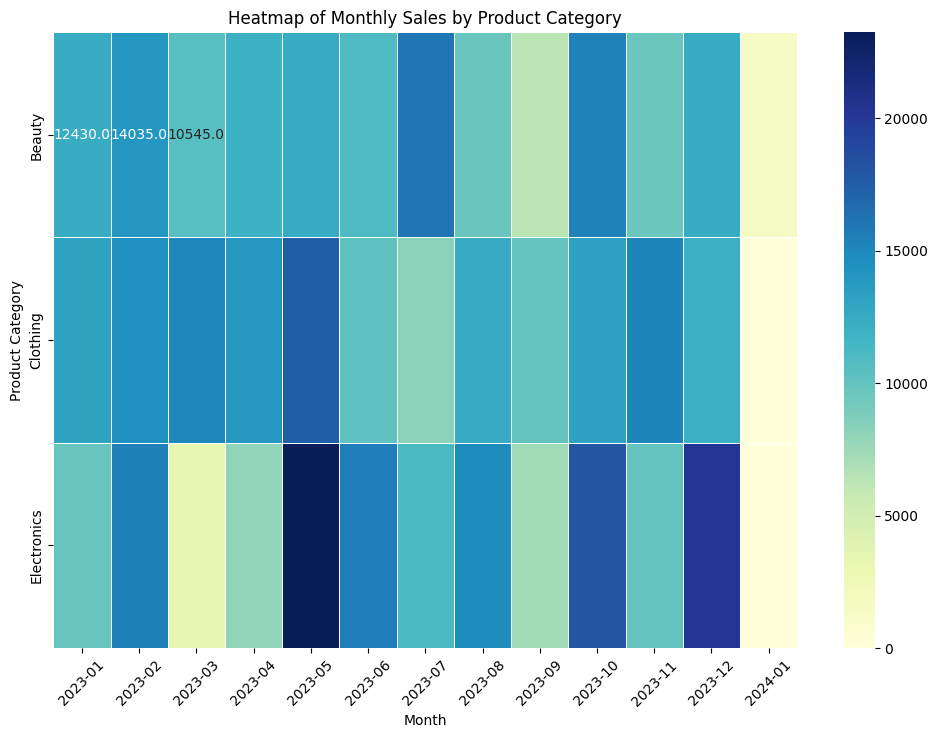

In [39]:
# Heatmap of monthly sales
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Monthly Sales by Product Category')
plt.xlabel('Month')
plt.ylabel('Product Category')
plt.xticks(rotation=45)
plt.show()

In [ ]:
'''
Here we can see that in the month of May 2023, Electronics contributed the most on that month and also overall.
Similarly, it contributed the least in the month of March 2023 if we exclude 2024

Clothing showed a steady trend across the months, with July 2023 contributing the least and May the most.
Beauty had the most sales in July and the least in September.
'''

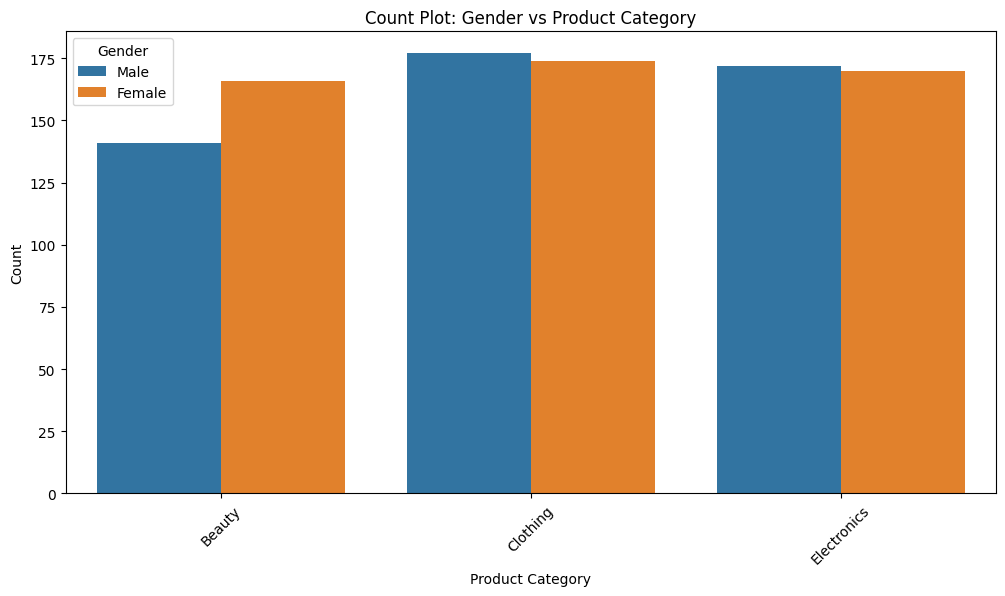

In [42]:
# Count Plot: Count of Gender and Product Category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product Category', hue='Gender')
plt.title('Count Plot: Gender vs Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

In [ ]:
'''
(i) Age group 29-34 targeted for Clothing products as it is generating significantly higher revenue compared to other product categories in this age group.

(ii) Age group 34-53 targeted for all product categories as there is no significant difference in revenue generated between them.

(iii) Age group 35-44 females targeted for products with amount 0-250 range as they seem to be dominating this age group.
'''

In [ ]:
'''
(I) The month of May especially the date of 16th May is the sales leader across the months with electronics dominating the sales.
Hence to maximize the revenue during that period or date further opportunity to market the Electronic products can be explored
followed by the Clothing products.

(II)Also the month-on-month trend indicates Clothing sales going downwards hence something needs to be done about it.
Also the sales slump in the month of September needs to be closely investigated and proper action should be taken.
'''

In [ ]:
'''
Since females show a tendency to buy Beauty products more frequently but spending least, 
the shop can introduce more high value female Beauty products to generate more revenue from the female customers.
'''